In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from scipy import stats
import statistics as st

In [2]:
data = pd.read_csv("../dataset/dataset_clean.csv")

In [3]:
data=data.drop(columns='Index')
data.head(10)

,Delivery_person_Age,Delivery_person_ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_order,Time_order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,Multiple_deliveries,Festival,City,Distance,Time_taken_(min)
0,36.0,4.5,23.351058,85.325731,23.371058,85.345731,2022-03-24 11:25:00,2022-03-24 11:35:00,Cloudy,High,1,Drinks,motorcycle,1.0,No,Metropolitian,3.018911,25.0
1,37.0,4.7,12.934365,77.616155,13.024365,77.706155,2022-03-25 17:40:00,2022-03-25 17:50:00,Fog,Medium,1,Meal,scooter,1.0,No,Metropolitian,13.973178,40.0
2,25.0,4.9,22.312790,73.170283,22.352790,73.210283,2022-03-19 13:40:00,2022-03-19 13:55:00,Cloudy,High,1,Drinks,scooter,1.0,No,Urban,6.058825,30.0
3,28.0,4.5,17.433809,78.386744,17.563809,78.516744,2022-03-10 23:35:00,2022-03-10 23:45:00,Sandstorms,Low,1,Drinks,motorcycle,1.0,No,Metropolitian,19.975520,11.0
4,22.0,4.5,12.310972,76.659264,12.390972,76.739264,2022-03-10 20:40:00,2022-03-10 20:55:00,Fog,Jam,0,Snack,motorcycle,1.0,No,Metropolitian,12.435540,47.0
5,37.0,4.8,19.091458,72.827808,19.101458,72.837808,2022-04-03 10:45:00,2022-04-03 10:50:00,Sunny,Low,1,Meal,scooter,1.0,No,Urban,1.529877,19.0
6,21.0,4.8,23.234249,77.434007,23.244249,77.444007,2022-02-15 09:40:00,2022-02-15 09:45:00,Windy,Low,1,Snack,scooter,1.0,No,Metropolitian,1.510088,15.0
7,35.0,4.2,15.303897,73.914336,15.323897,73.934336,2022-02-13 08:30:00,2022-02-13 08:35:00,Windy,Low,0,Snack,motorcycle,1.0,No,Metropolitian,3.089737,31.0
8,34.0,4.5,22.514688,88.393294,22.564688,88.443294,2022-02-11 18:35:00,2022-02-11 18:40:00,Fog,Medium,2,Drinks,electric_scooter,1.0,No,Urban,7.568330,18.0
9,22.0,5.0,26.911927,75.797282,26.931927,75.817282,2022-04-01 08:20:00,2022-04-01 08:35:00,Fog,Low,0,Buffet,motorcycle,1.0,No,Metropolitian,2.979521,20.0


In [4]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in data.columns:
    print('{} : {}'.format(col,data[col].unique()))

Delivery_person_Age : [36. 37. 25. 28. 22. 21. 35. 34. 39. 33. 38. 27. 26. 31. 30. 32. 24. 29.
 23. 20. 15.]
Delivery_person_ratings : [4.5 4.7 4.9 4.8 4.2 5.  4.6 4.4 3.7 3.8 4.  4.3 4.1 3.9 3.6 3.5 2.9 3.3
 2.6 3.2 1.  2.5 3.4 3.1 2.7 2.8 3. ]
Restaurant_latitude : [23.351058 12.934365 22.31279  17.433809 12.310972 19.091458 23.234249
 15.303897 22.514688 26.911927 13.064181 22.753659 19.874449 22.308096
 12.284747 13.049645 19.131141 22.761226 26.892312 27.160934 11.006686
 17.431477 13.045479 26.47775  17.422819 26.492106 21.173343 22.727021
 22.725748 23.357804 23.353783 18.530963 22.552996 12.914264 21.170798
 12.972532 15.496162 11.024839 22.311358 22.311603 26.473698 26.90519
 17.45971  19.055831 22.75004  26.471617 11.022169 23.371292 12.323194
 22.751857 19.003517 17.430448 12.352058  9.985497 19.221315 13.091809
 22.539129 13.086438 18.994049 12.334022 13.026286 22.307898 10.96185
  9.982834 21.157729 22.761593 26.463504 26.913483 12.299524 12.972793
 23.39925  12.98041  21.

In [5]:
# Examine numerical features in the dataset
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Delivery_person_Age', 'Delivery_person_ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Vehicle_condition',
       'Multiple_deliveries', 'Distance', 'Time_taken_(min)'],
      dtype='object')

In [6]:
# Examine categorical features in the dataset
categorical_features = data.select_dtypes(include=[object])
categorical_features.columns

Index(['Time_order', 'Time_order_picked', 'Weather_conditions',
       'Road_traffic_density', 'Type_of_order', 'Type_of_vehicle', 'Festival',
       'City'],
      dtype='object')

In [7]:
import sweetviz as sv
analyze_report = sv.analyze(data)
analyze_report.show_html('analyze_dataset_clean.html', open_browser=True)

d:\AppDownload\Settingg\anaconda3\envs\datascientist\lib\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
d:\AppDownload\Settingg\anaconda3\envs\datascientist\lib\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

d:\AppDownload\Settingg\anaconda3\envs\datascientist\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
d:\AppDownload\Settingg\anaconda3\envs\datascientist\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
d:\AppDownload\Settingg\anaconda3\envs\datascientist\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
d:\AppDownload\Settingg\anaconda3\envs\datascientist\lib\site-packages\sweetviz\series_analyzer_nume

Report analyze_dataset_clean.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Descriptive statistics (Thống kê mô tả)

Central tendencies (Hướng trung tâm):

In [8]:
#  Get various summary statistics that exclude NaN values
data[numeric_features.columns].describe()

,Delivery_person_Age,Delivery_person_ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,Multiple_deliveries,Distance,Time_taken_(min)
count,41062.000000,41062.000000,41062.000000,41062.000000,41062.000000,41062.000000,41062.000000,41062.000000,41062.000000,41062.000000
mean,29.402562,4.636150,18.901079,76.912670,18.964751,76.976342,1.001096,1.059471,9.721300,26.322025
std,5.764189,0.324449,5.462037,3.491631,5.463857,3.491833,0.817465,0.267072,5.601228,9.377532
min,15.000000,1.000000,9.957144,72.768726,9.967144,72.778726,0.000000,1.000000,1.465067,10.000000
25%,24.000000,4.500000,12.986047,73.897902,13.065801,73.939315,0.000000,1.000000,4.657655,19.000000
50%,29.000000,4.700000,19.065838,76.618203,19.119300,76.662620,1.000000,1.000000,9.193021,26.000000
75%,34.000000,4.800000,22.751234,78.363530,22.818163,78.403391,2.000000,1.000000,13.680920,32.000000
max,39.000000,5.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,20.969489,54.000000


In [9]:
print("Calculate mode value of features:")
for feature in data.columns:
    mode=st.mode(data[feature])
    print(f'{feature}:', mode)

Calculate mode value of features:
Delivery_person_Age: 24.0
Delivery_person_ratings: 4.8
Restaurant_latitude: 26.911378
Restaurant_longitude: 75.789034
Delivery_location_latitude: 26.923483
Delivery_location_longitude: 75.813139
Time_order: 2022-03-20 20:15:00
Time_order_picked: 2022-03-29 23:55:00
Weather_conditions: Fog
Road_traffic_density: Low
Vehicle_condition: 1
Type_of_order: Snack
Type_of_vehicle: motorcycle
Multiple_deliveries: 1.0
Festival: No
City: Metropolitian
Distance: 1.4897806661060058
Time_taken_(min): 26.0


In [10]:
print("Calculate median value of numerical features:")
for feature in numeric_features.columns:
    print(f'{feature}:', data[feature].median())

Calculate median value of numerical features:
Delivery_person_Age: 29.0
Delivery_person_ratings: 4.7
Restaurant_latitude: 19.065838
Restaurant_longitude: 76.618203
Delivery_location_latitude: 19.1193
Delivery_location_longitude: 76.66262
Vehicle_condition: 1.0
Multiple_deliveries: 1.0
Distance: 9.193021332525271
Time_taken_(min): 26.0


In [11]:
print("Calculate mean value of numerical features:")
for feature in numeric_features.columns:
    print(f'{feature}:', data[feature].mean())

Calculate mean value of numerical features:
Delivery_person_Age: 29.402561979445718
Delivery_person_ratings: 4.6361502118747255
Restaurant_latitude: 18.90107899493449
Restaurant_longitude: 76.91266998358581
Delivery_location_latitude: 18.964750518825188
Delivery_location_longitude: 76.97634150618578
Vehicle_condition: 1.001095903755297
Multiple_deliveries: 1.0594710437874433
Distance: 9.721299796720539
Time_taken_(min): 26.32202523013979


Dispersion (Độ phân tán):

In [12]:
print("Standard deviation (Độ lệch chuẩn):")
data.std(numeric_only=True)

Standard deviation (Độ lệch chuẩn):


Delivery_person_Age            5.764189
Delivery_person_ratings        0.324449
Restaurant_latitude            5.462037
Restaurant_longitude           3.491631
Delivery_location_latitude     5.463857
Delivery_location_longitude    3.491833
Vehicle_condition              0.817465
Multiple_deliveries            0.267072
Distance                       5.601228
Time_taken_(min)               9.377532
dtype: float64

In [13]:
print("Variance (Phương sai):")
data.var(numeric_only=True)

Variance (Phương sai):


Delivery_person_Age            33.225875
Delivery_person_ratings         0.105267
Restaurant_latitude            29.833848
Restaurant_longitude           12.191486
Delivery_location_latitude     29.853729
Delivery_location_longitude    12.192900
Vehicle_condition               0.668248
Multiple_deliveries             0.071327
Distance                       31.373751
Time_taken_(min)               87.938113
dtype: float64

In [14]:
numeric_features.columns

Index(['Delivery_person_Age', 'Delivery_person_ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Vehicle_condition',
       'Multiple_deliveries', 'Distance', 'Time_taken_(min)'],
      dtype='object')

# Shape of data

In [15]:
data.skew(numeric_only=True)

Delivery_person_Age            0.032182
Delivery_person_ratings       -2.461412
Restaurant_latitude            0.107412
Restaurant_longitude           1.189652
Delivery_location_latitude     0.108138
Delivery_location_longitude    1.188865
Vehicle_condition              0.005742
Multiple_deliveries            4.867112
Distance                       0.324138
Time_taken_(min)               0.479777
dtype: float64

C:\Users\DUCNM\AppData\Local\Temp\ipykernel_11896\1134466390.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.skew(numeric_only=True), color='blue',axlabel ='Skewness')


<AxesSubplot:xlabel='Skewness', ylabel='Density'>

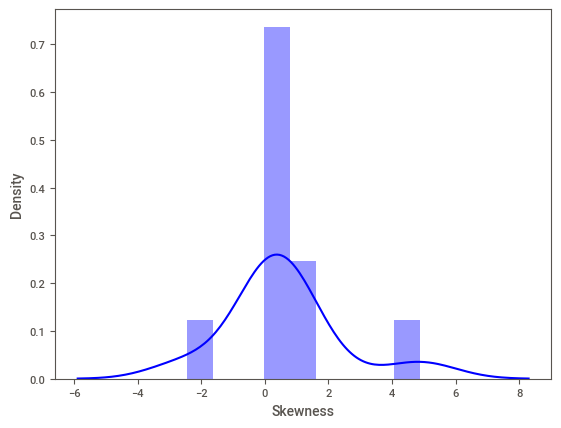

In [16]:
sns.distplot(data.skew(numeric_only=True), color='blue',axlabel ='Skewness')

In [17]:
data.kurt(numeric_only=True)

Delivery_person_Age            -1.213501
Delivery_person_ratings        13.628944
Restaurant_latitude            -1.000441
Restaurant_longitude            1.451742
Delivery_location_latitude     -0.999682
Delivery_location_longitude     1.449972
Vehicle_condition              -1.484608
Multiple_deliveries            25.236116
Distance                       -0.905127
Time_taken_(min)               -0.315953
dtype: float64

C:\Users\DUCNM\AppData\Local\Temp\ipykernel_11896\2935931933.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.kurt(numeric_only=True),color='red',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)


<AxesSubplot:xlabel='Kurtosis', ylabel='Density'>

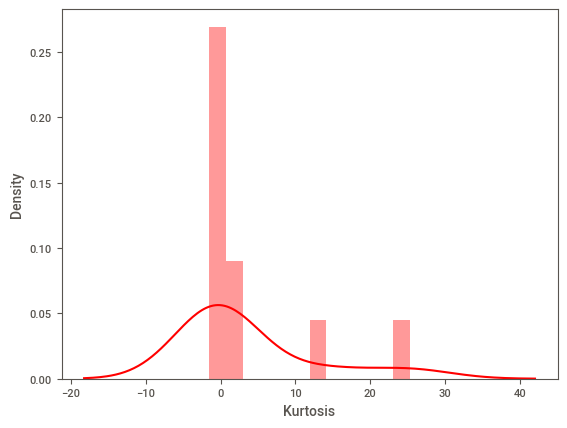

In [18]:
sns.distplot(data.kurt(numeric_only=True),color='red',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)

# Correlation

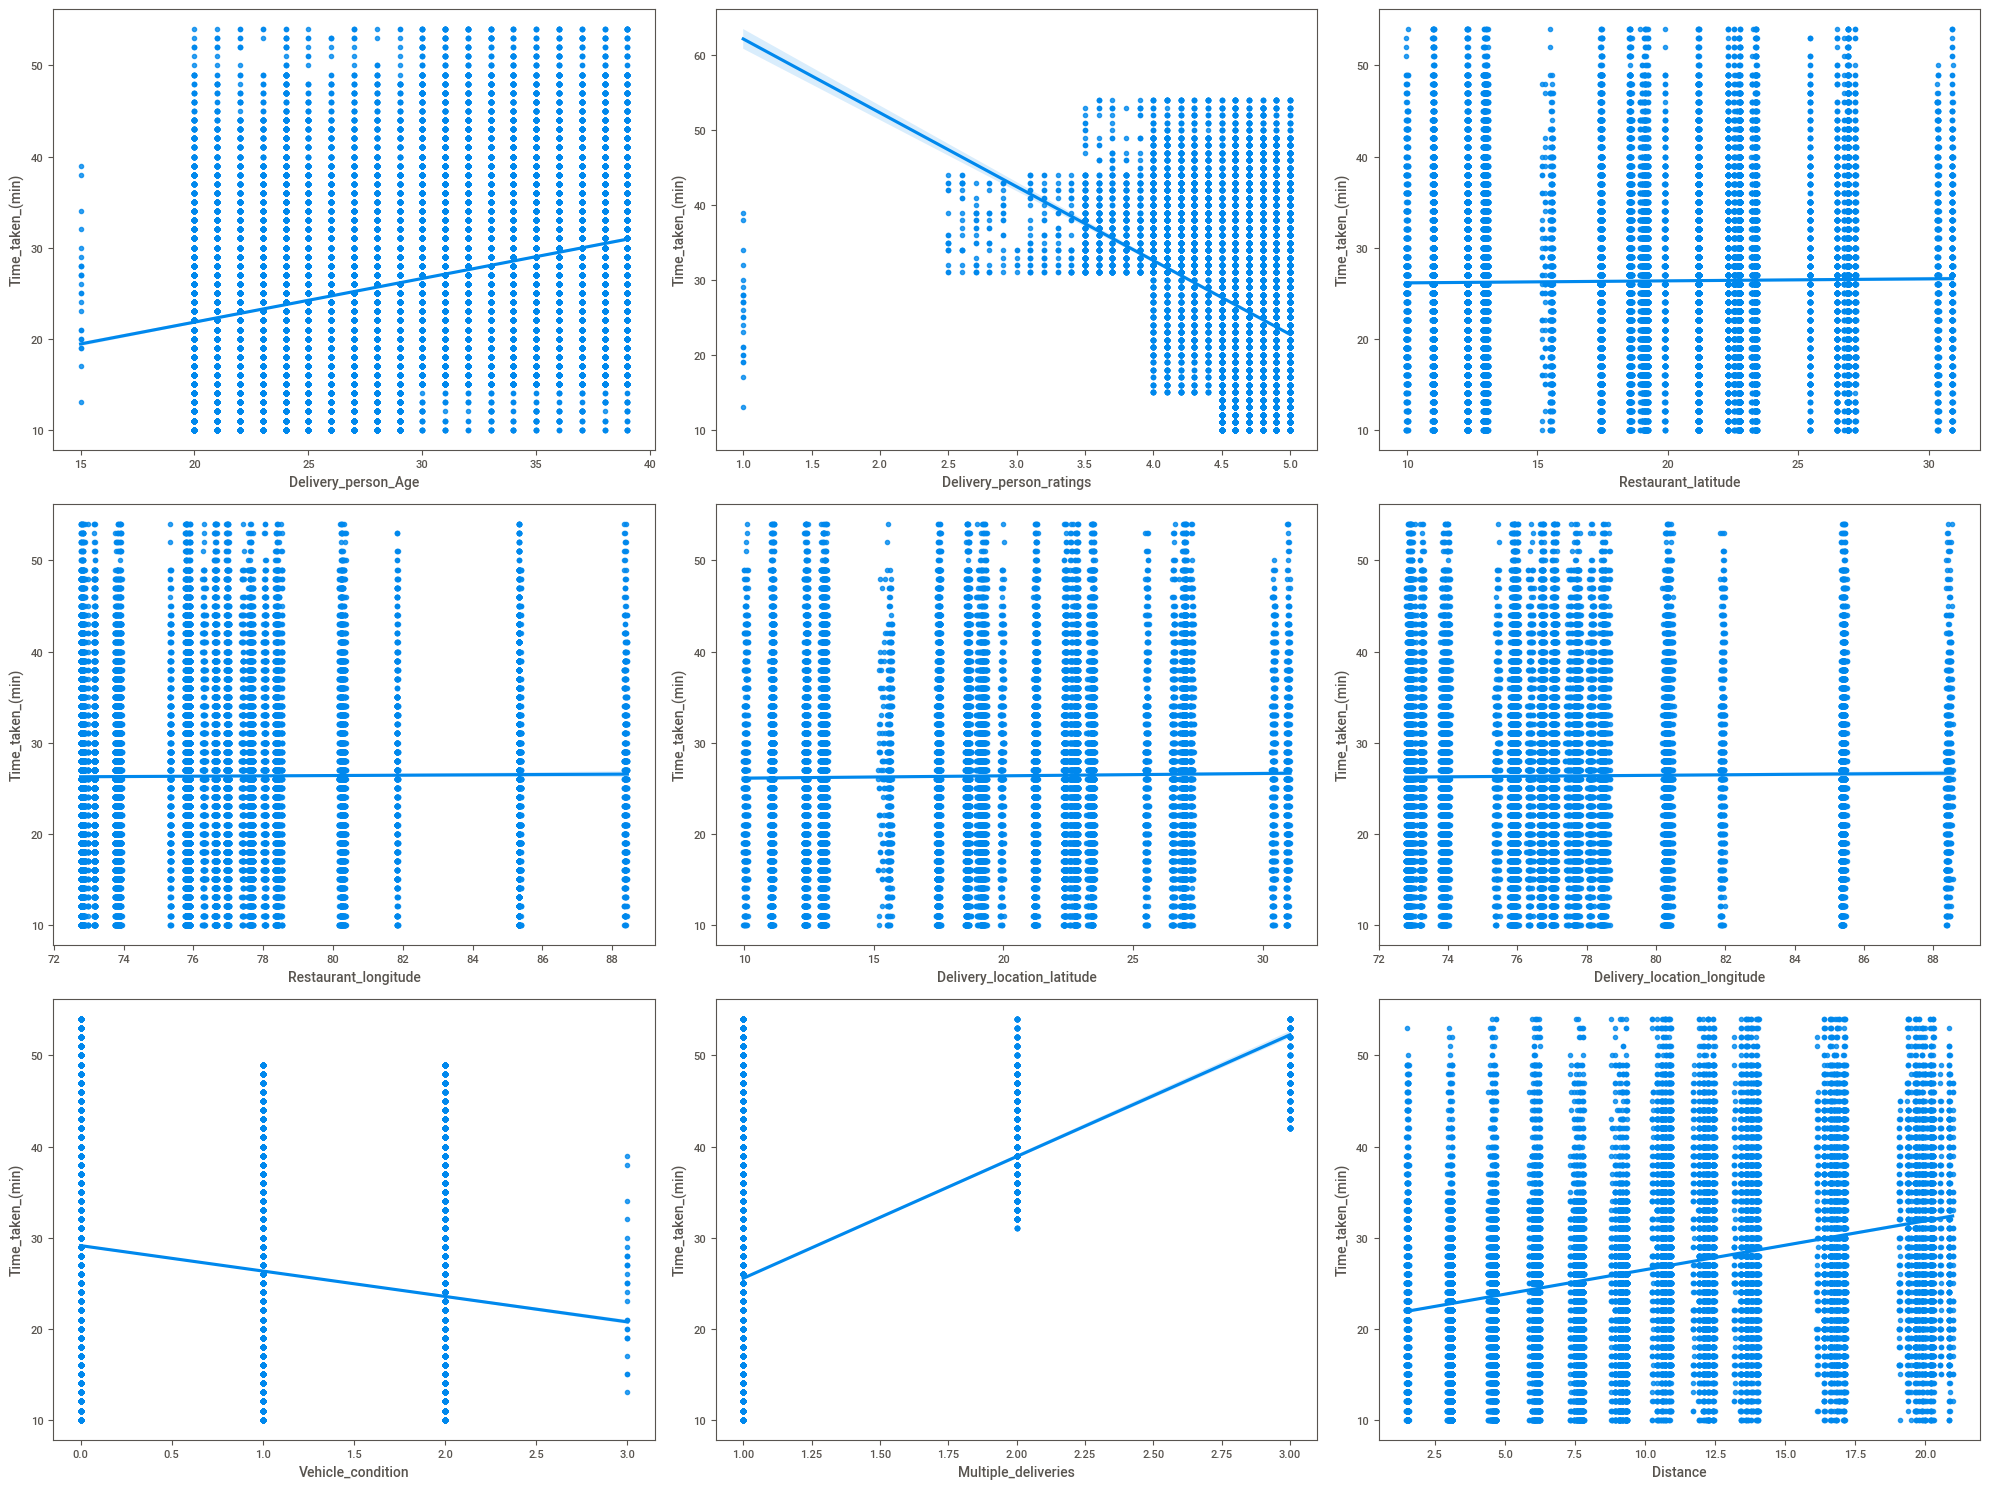

In [19]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

sns.regplot(x=data["Delivery_person_Age"], y=data["Time_taken_(min)"], ax=axes[0,0])
sns.regplot(x=data["Delivery_person_ratings"], y=data["Time_taken_(min)"], ax=axes[0,1])
sns.regplot(x=data["Restaurant_latitude"], y=data["Time_taken_(min)"], ax=axes[0,2])
sns.regplot(x=data["Restaurant_longitude"], y=data["Time_taken_(min)"], ax=axes[1,0])
sns.regplot(x=data["Delivery_location_latitude"], y=data["Time_taken_(min)"], ax=axes[1,1])
sns.regplot(x=data["Delivery_location_longitude"], y=data["Time_taken_(min)"], ax=axes[1,2])
sns.regplot(x=data["Vehicle_condition"], y=data["Time_taken_(min)"], ax=axes[2,0])
sns.regplot(x=data["Multiple_deliveries"], y=data["Time_taken_(min)"], ax=axes[2,1])
sns.regplot(x=data["Distance"], y=data["Time_taken_(min)"], ax=axes[2,2])
plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'Correlation of Features with Time Taken'}>

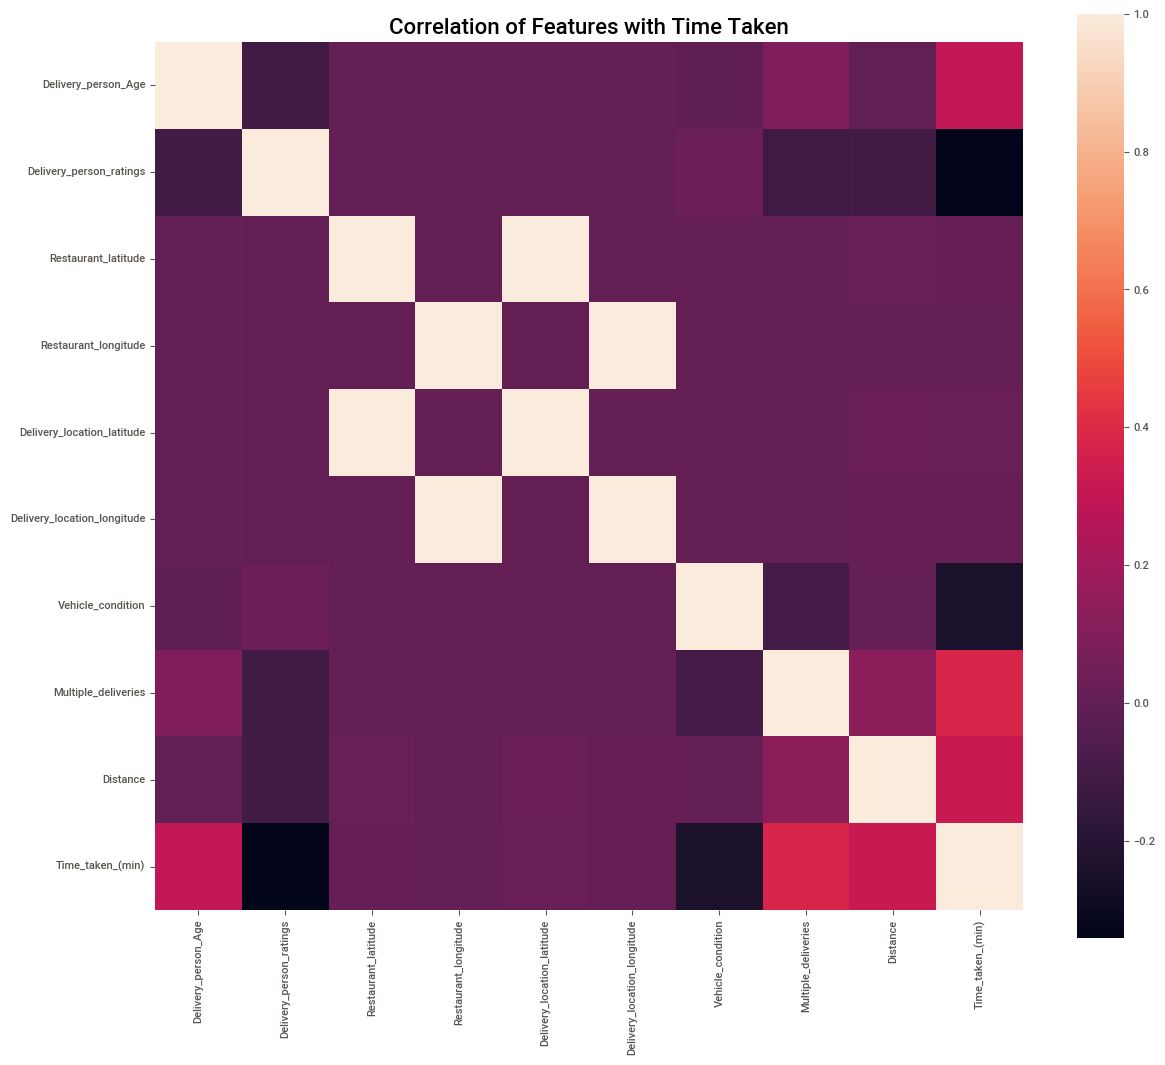

In [20]:
f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of Features with Time Taken',y=1,size=16)
sns.heatmap(data.corr(numeric_only=True),square = True,  vmax=1)

In [21]:
correlation = numeric_features.corr()
print(correlation['Time_taken_(min)'].sort_values(ascending = False),'\n')

Time_taken_(min)               1.000000
Multiple_deliveries            0.380796
Distance                       0.321052
Delivery_person_Age            0.294801
Delivery_location_latitude     0.015041
Restaurant_latitude            0.012886
Delivery_location_longitude    0.010288
Restaurant_longitude           0.006911
Vehicle_condition             -0.243268
Delivery_person_ratings       -0.341350
Name: Time_taken_(min), dtype: float64 



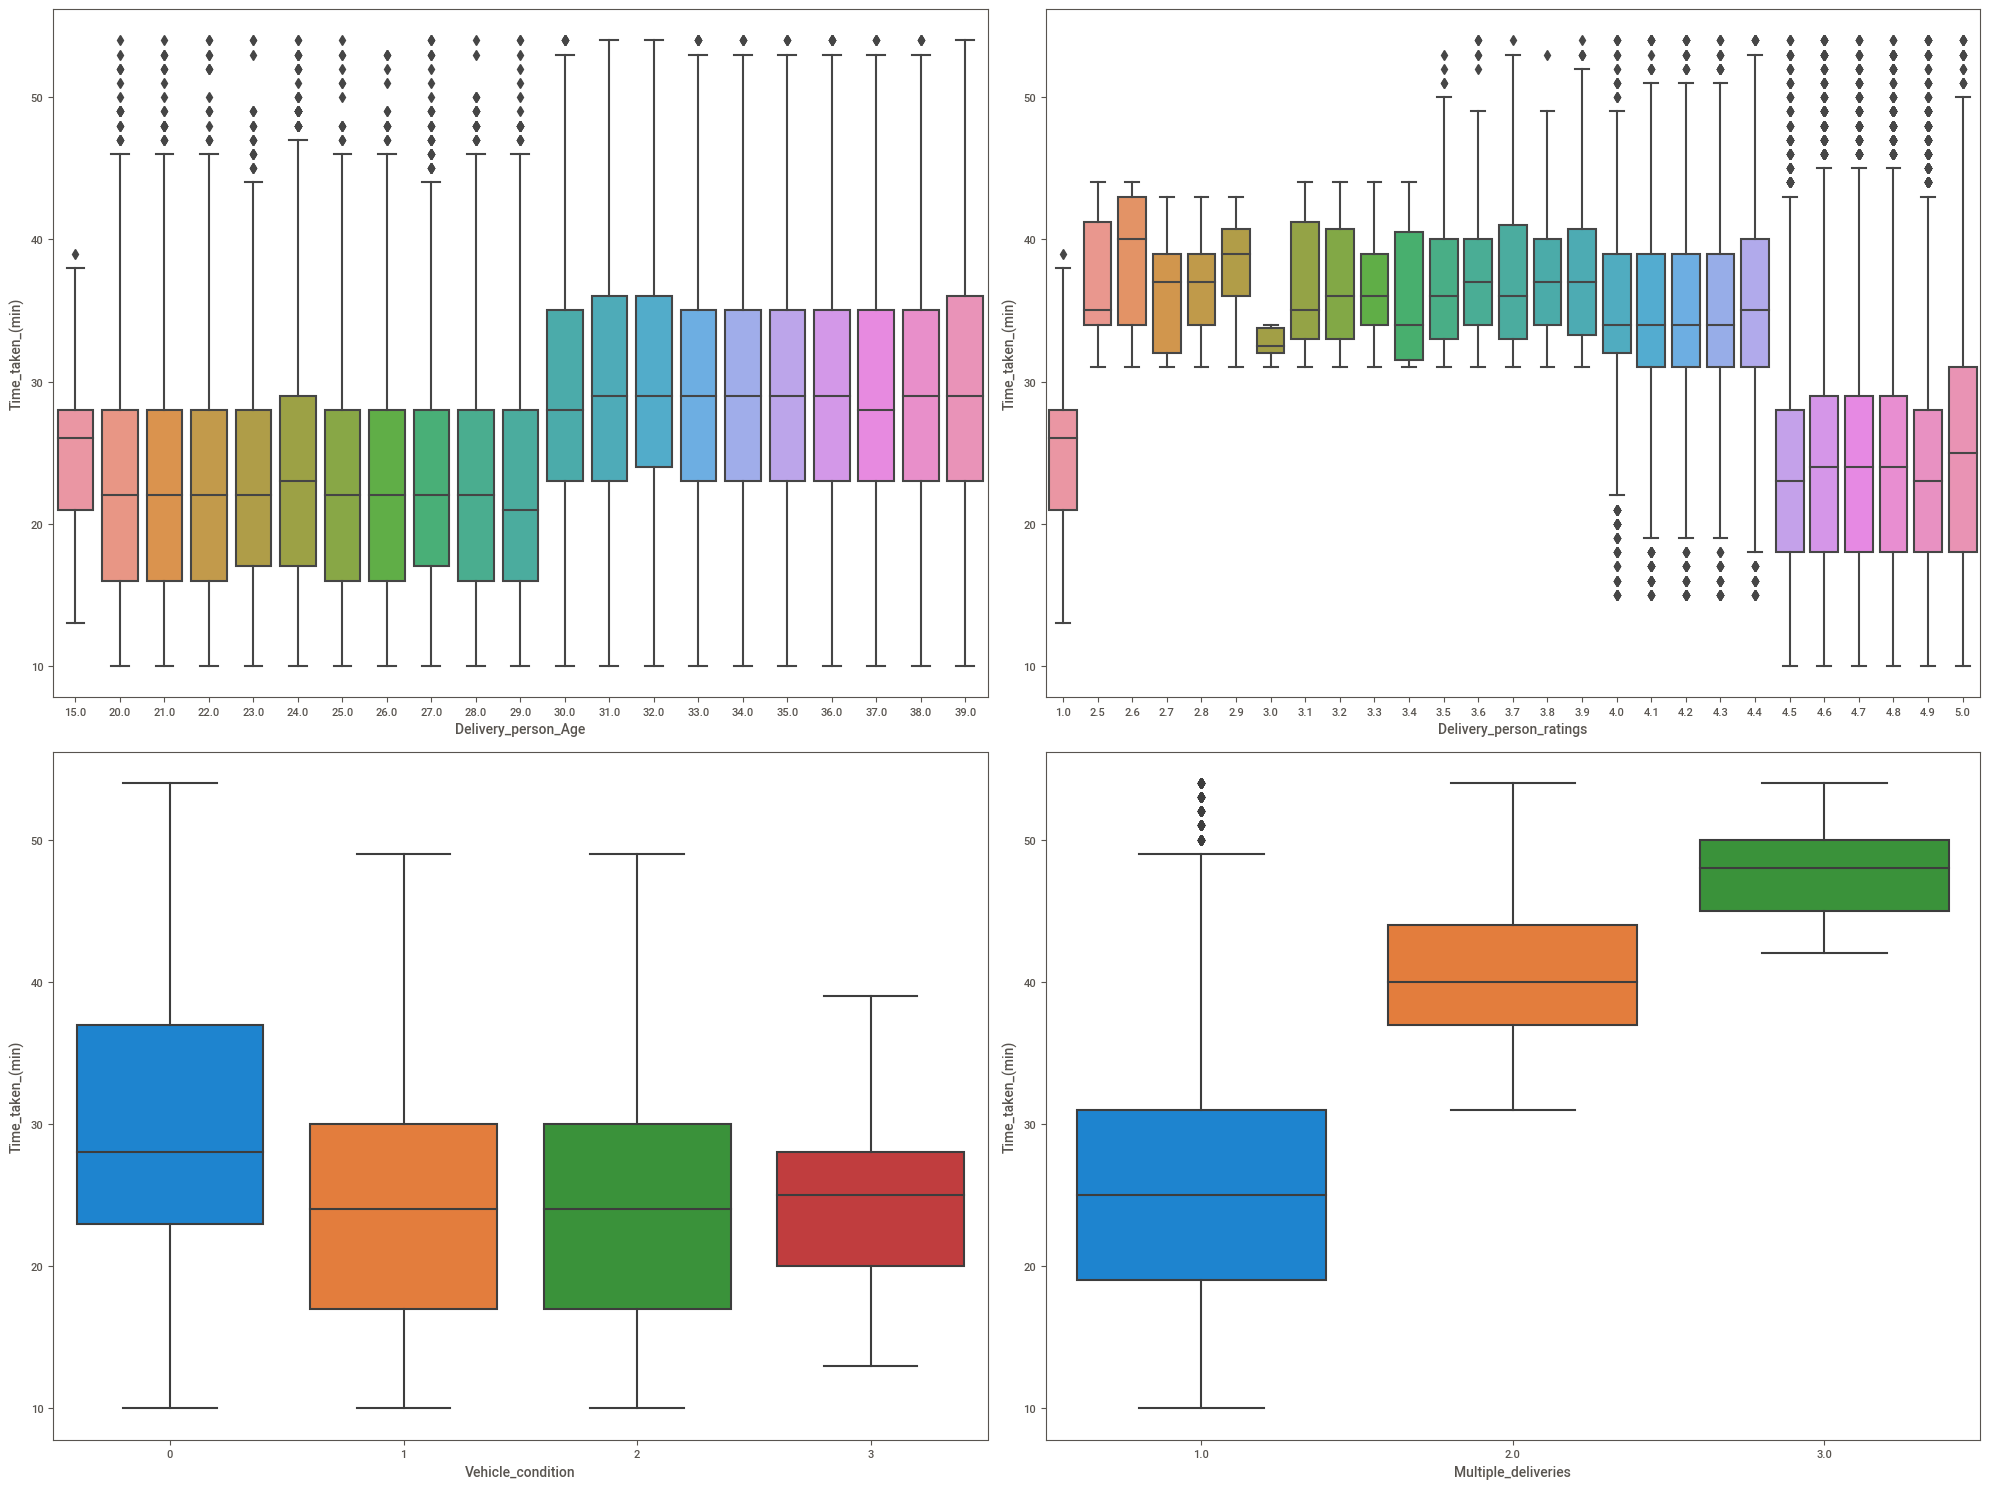

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
sns.boxplot(x="Delivery_person_Age", y="Time_taken_(min)", data=data, ax=axes[0,0])
sns.boxplot(x="Delivery_person_ratings", y="Time_taken_(min)", data=data, ax=axes[0,1])
sns.boxplot(x="Vehicle_condition", y="Time_taken_(min)", data=data, ax=axes[1,0])
sns.boxplot(x="Multiple_deliveries", y="Time_taken_(min)", data=data, ax=axes[1,1])
plt.tight_layout()
plt.show()

In [23]:
categorical_features.columns

Index(['Time_order', 'Time_order_picked', 'Weather_conditions',
       'Road_traffic_density', 'Type_of_order', 'Type_of_vehicle', 'Festival',
       'City'],
      dtype='object')

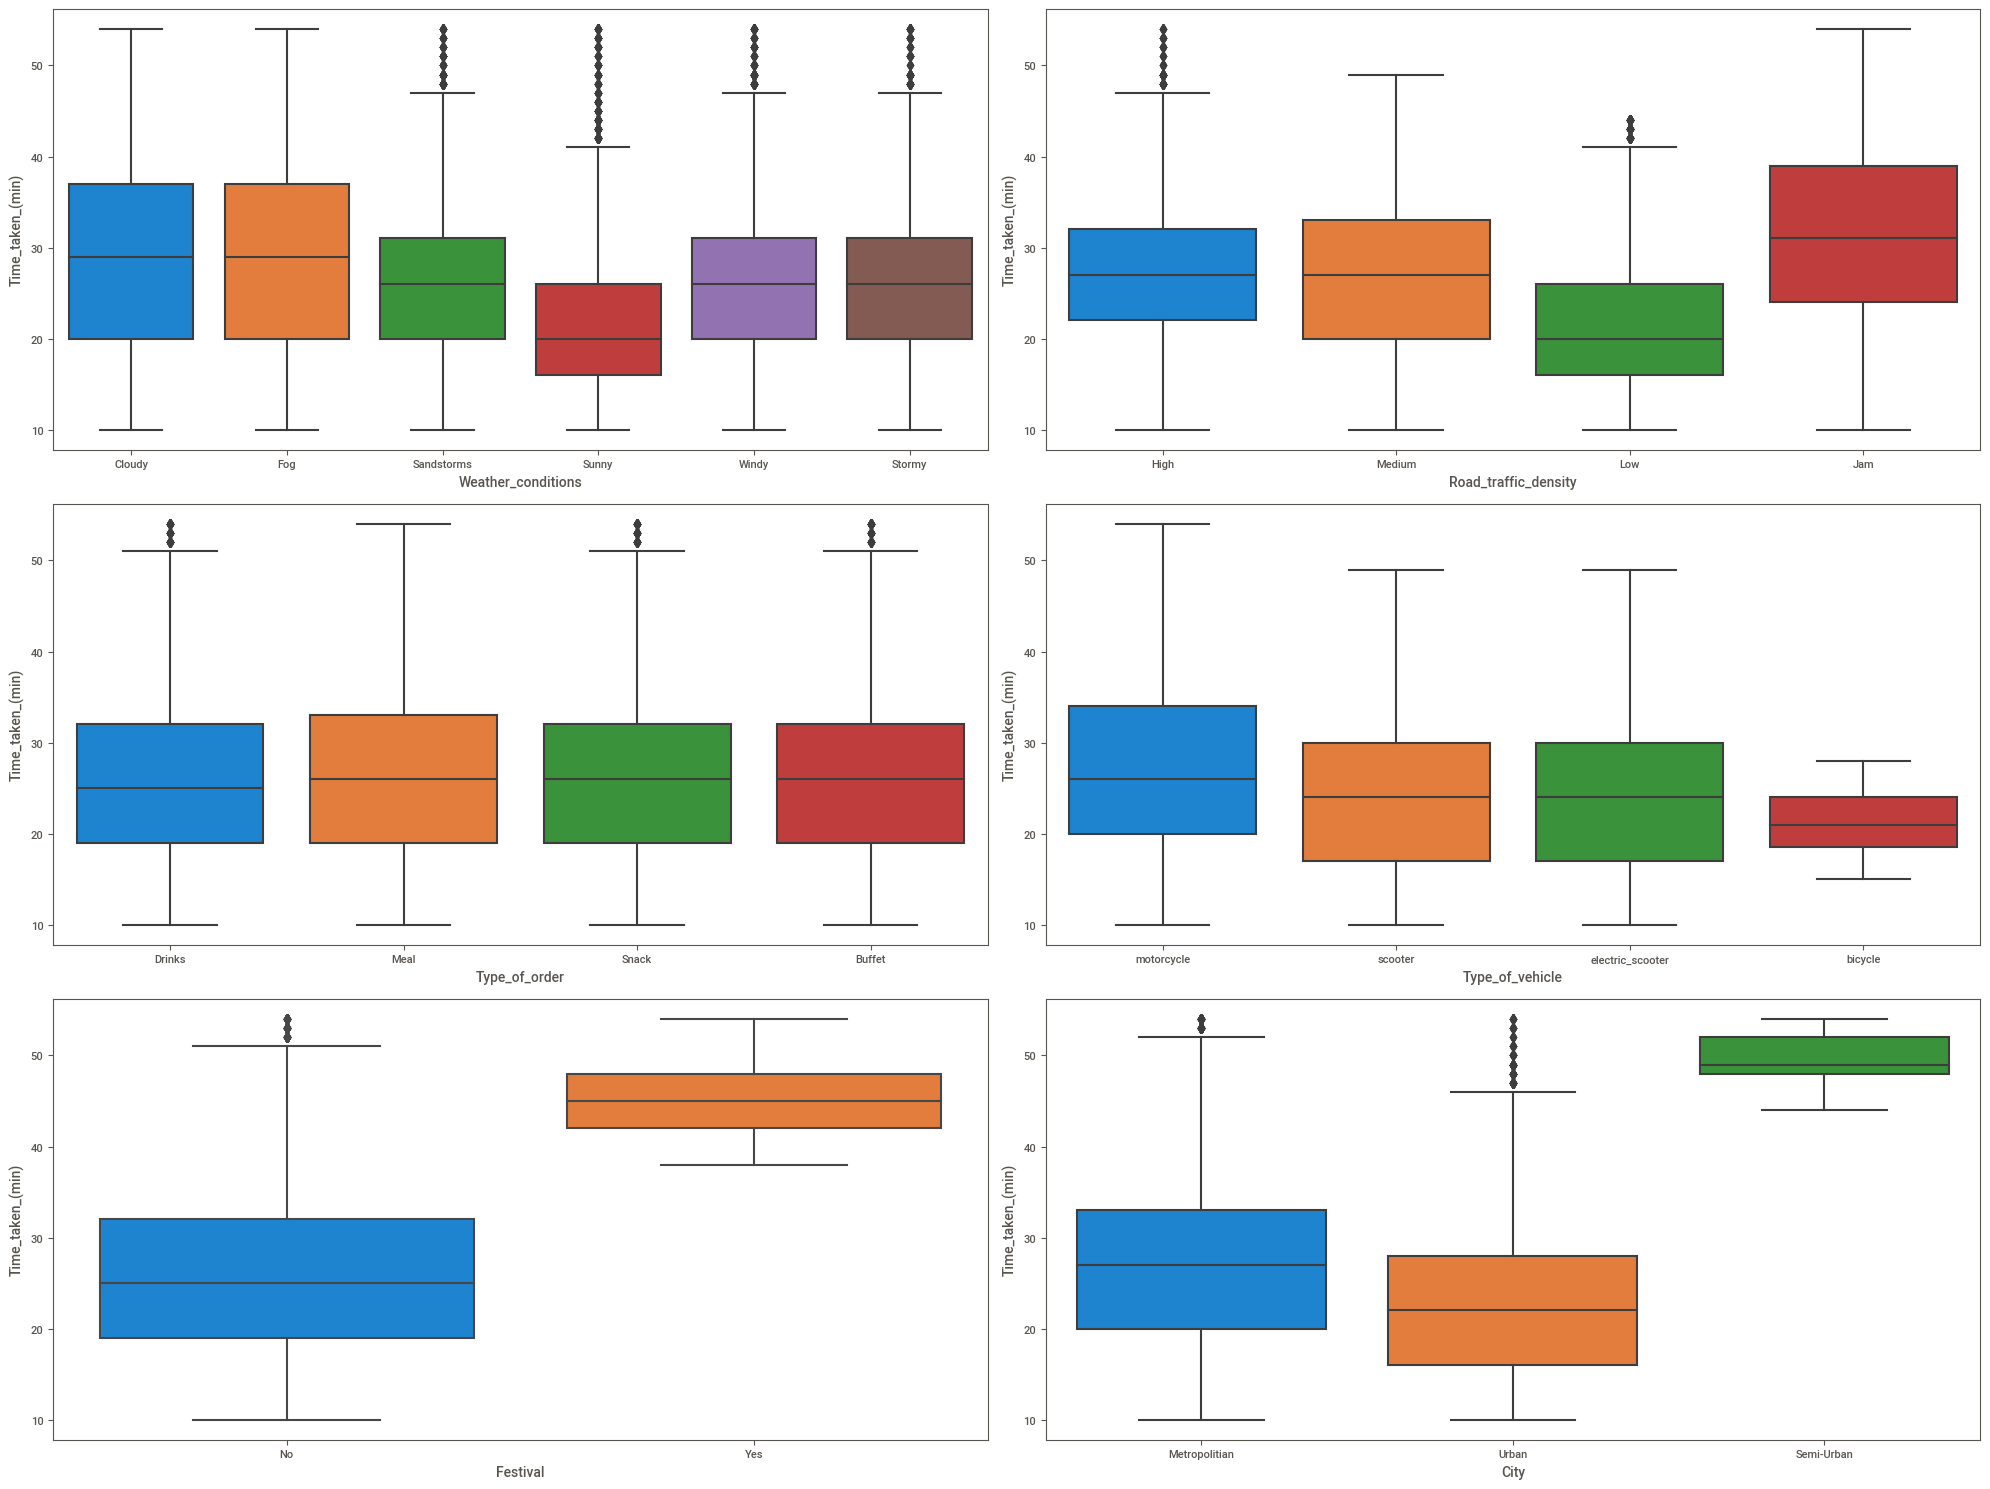

In [24]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
sns.boxplot(x="Weather_conditions", y="Time_taken_(min)", data=data, ax=axes[0,0])
sns.boxplot(x="Road_traffic_density", y="Time_taken_(min)", data=data, ax=axes[0,1])
sns.boxplot(x="Type_of_order", y="Time_taken_(min)", data=data, ax=axes[1,0])
sns.boxplot(x="Type_of_vehicle", y="Time_taken_(min)", data=data, ax=axes[1,1])
sns.boxplot(x="Festival", y="Time_taken_(min)", data=data, ax=axes[2,0])
sns.boxplot(x="City", y="Time_taken_(min)", data=data, ax=axes[2,1])
plt.tight_layout()
plt.show()

# Group By

In [25]:
categorical_features.columns

Index(['Time_order', 'Time_order_picked', 'Weather_conditions',
       'Road_traffic_density', 'Type_of_order', 'Type_of_vehicle', 'Festival',
       'City'],
      dtype='object')

In [26]:
data_gb = data[["Road_traffic_density", "Type_of_order","Time_taken_(min)"]]
data_groupby = data_gb.groupby(["Road_traffic_density", "Type_of_order"], as_index=False).mean()

data_groupby

,Road_traffic_density,Type_of_order,Time_taken_(min)
0,High,Buffet,26.996071
1,High,Drinks,27.399602
2,High,Meal,27.329138
3,High,Snack,27.151886
4,Jam,Buffet,31.374723
5,Jam,Drinks,30.867670
6,Jam,Meal,31.206624
7,Jam,Snack,31.321179
8,Low,Buffet,21.218213
9,Low,Drinks,21.211478


In [27]:
data_pivot = data_groupby.pivot(index="Road_traffic_density", columns="Type_of_order")
data_pivot

Time_taken_(min)                                 
Type_of_order                  Buffet     Drinks       Meal      Snack
Road_traffic_density                                                  
High                        26.996071  27.399602  27.329138  27.151886
Jam                         31.374723  30.867670  31.206624  31.321179
Low                         21.218213  21.211478  21.496985  21.226363
Medium                      26.556759  26.734996  26.980910  26.677650

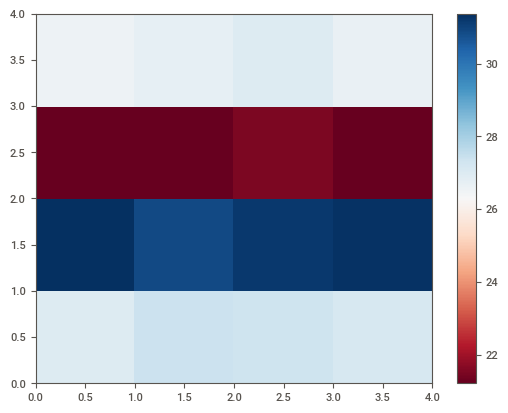

In [28]:
plt.pcolor(data_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

# Phân tích ANOVA

In [29]:
categorical_features.columns

Index(['Time_order', 'Time_order_picked', 'Weather_conditions',
       'Road_traffic_density', 'Type_of_order', 'Type_of_vehicle', 'Festival',
       'City'],
      dtype='object')

In [30]:
data_anova = data[["Festival","Time_taken_(min)"]]
grouped_anova = data_anova.groupby(['Festival'])
anova_result = stats.f_oneway(grouped_anova.get_group('Yes')['Time_taken_(min)'],
                              grouped_anova.get_group('No')['Time_taken_(min)'],)
anova_result

F_onewayResult(statistic=3708.7367320052217, pvalue=0.0)

In [31]:
data_anova = data[["City","Time_taken_(min)"]]
grouped_anova = data_anova.groupby(['City'])
anova_result = stats.f_oneway(grouped_anova.get_group('Urban')['Time_taken_(min)'],
                              grouped_anova.get_group('Metropolitian')['Time_taken_(min)'],
                              grouped_anova.get_group('Semi-Urban')['Time_taken_(min)'])
anova_result

F_onewayResult(statistic=1376.5446549520946, pvalue=0.0)

In [32]:
data_anova = data[["Type_of_order","Time_taken_(min)"]]
grouped_anova = data_anova.groupby(['Type_of_order'])
anova_result = stats.f_oneway(grouped_anova.get_group('Buffet')['Time_taken_(min)'],
                              grouped_anova.get_group('Snack')['Time_taken_(min)'],
                              grouped_anova.get_group('Drinks')['Time_taken_(min)'],
                              grouped_anova.get_group('Meal')['Time_taken_(min)'])
anova_result

F_onewayResult(statistic=2.028742592938786, pvalue=0.10750728634781466)

In [33]:
data_anova = data[["Weather_conditions","Time_taken_(min)"]]
grouped_anova = data_anova.groupby(['Weather_conditions'])
anova_result = stats.f_oneway(grouped_anova.get_group('Fog')['Time_taken_(min)'],
                              grouped_anova.get_group('Cloudy')['Time_taken_(min)'],
                              grouped_anova.get_group('Sandstorms')['Time_taken_(min)'],
                              grouped_anova.get_group('Sunny')['Time_taken_(min)'],
                              grouped_anova.get_group('Windy')['Time_taken_(min)'],
                              grouped_anova.get_group('Stormy')['Time_taken_(min)'])
anova_result

F_onewayResult(statistic=557.4508299962844, pvalue=0.0)

In [34]:
data_anova = data[["Type_of_vehicle","Time_taken_(min)"]]
grouped_anova = data_anova.groupby(['Type_of_vehicle'])
anova_result = stats.f_oneway(grouped_anova.get_group('bicycle')['Time_taken_(min)'],
                              grouped_anova.get_group('scooter')['Time_taken_(min)'],
                              grouped_anova.get_group('motorcycle')['Time_taken_(min)'],
                              grouped_anova.get_group('electric_scooter')['Time_taken_(min)'])
anova_result

F_onewayResult(statistic=379.00355696618215, pvalue=7.627377995140148e-243)

In [35]:
data_anova = data[["Road_traffic_density","Time_taken_(min)"]]
grouped_anova = data_anova.groupby(['Road_traffic_density'])
anova_result = stats.f_oneway(grouped_anova.get_group('Jam')['Time_taken_(min)'],
                              grouped_anova.get_group('Medium')['Time_taken_(min)'],
                              grouped_anova.get_group('High')['Time_taken_(min)'],
                              grouped_anova.get_group('Low')['Time_taken_(min)'])
anova_result

F_onewayResult(statistic=3106.5249320754474, pvalue=0.0)

# Features Selection:
    * Numerical feature:
        Multiple_deliveries
        Distance
        Delivery_person_Age
    * Categorical feature:
        Festival
        Road_traffic_density